In [2]:
import pandas as pd

df = pd.read_pickle("data/videos_processed_wide.pkl")
df

,title,view_timeseries,thumbnail_url,video_id,subscribers,channel_title,category,blacklisted,duration,day0,...,day10,day11,day12,day13,day14,day15,day16,day17,day18,day19
1,Mario Sports Superstars Football: Baby Mario &...,"[(547, 0, -3.3210900488693595), (776, 1, -1.41...",https://i.ytimg.com/vi/35gfRMPwxkc/mqdefault.jpg,35gfRMPwxkc,92400,VMGAMING,Gaming,None,3118.0,547,...,984,997,1010,1021,1027,1034,1041,1049,1051,1057
2,WORST BREAKOUT EVER?! What to do when your ski...,"[(5724, 0, -2.8782804774410082), (8555, 1, -1....",https://i.ytimg.com/vi/4fklg-BTY4g/mqdefault.jpg,4fklg-BTY4g,389000,Soo Beauty 수뷰티,Howto & Style,None,1395.0,5724,...,13311,13538,13928,14119,14356,14529,14647,14765,14853,14968
4,Andrew Fox | IDF & War Crimes | Israel-Hamas W...,"[(326, 0, -0.732712712487337), (370, 1, -0.601...",https://i.ytimg.com/vi/lmC1JnlYDQw/mqdefault.jpg,lmC1JnlYDQw,48200,Shana Meyerson YOGAthletica,News & Politics,None,4621.0,326,...,433,437,445,445,449,448,886,1325,1327,1329
8,Ondo Finance vs Sabai Protocol | Sabai Token |...,"[(1849, 0, -3.726489165399963), (2350, 1, -1.3...",https://i.ytimg.com/vi/gBojwpJBE7c/mqdefault.jpg,gBojwpJBE7c,196000,Global Rashid,Education,None,516.0,1849,...,2722,2727,2739,2745,2748,2753,2760,2768,2770,2776
41,Theo Ogimaa Favell Traditional Vs Woodland Spe...,"[(153, 0, -3.4079659402564997), (200, 1, -1.34...",https://i.ytimg.com/vi/GFHqYCmL92w/mqdefault.jpg,GFHqYCmL92w,95400,PowWows.com,Travel & Events,None,1912.0,153,...,240,242,244,244,245,246,247,248,248,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58040,Temple Square Lights,"[(340, 0, -3.297029702970298), (351, 1, -2.207...",https://i.ytimg.com/vi/Thnn1wuZZhI/mqdefault.jpg,Thnn1wuZZhI,371000,KSL News,Travel & Events,NaN,691.0,340,...,378,378,378,378,378,378,379,379,379,379
58041,"Utah's Morning News - November 29th, 2024","[(1586, 0, -2.07707151142496), (1628, 1, -2.06...",https://i.ytimg.com/vi/G_Ba5DSPUDw/mqdefault.jpg,G_Ba5DSPUDw,371000,KSL News,News & Politics,NaN,13941.0,1586,...,10894,10897,10905,10907,10906,10914,10923,10929,10935,10937
58042,Couple reunited after wife spots missing husba...,"[(164428, 0, -2.6447223135664637), (234821, 1,...",https://i.ytimg.com/vi/KFmWa84YOcY/mqdefault.jpg,KFmWa84YOcY,371000,KSL News,News & Politics,NaN,181.0,164428,...,555690,556949,559948,561114,562446,563423,564400,565138,565876,566747
58045,Utah program helping relocate beavers to resto...,"[(2520, 0, -1.945072273686186), (3244, 1, -1.8...",https://i.ytimg.com/vi/9-L___3vV9s/mqdefault.jpg,9-L___3vV9s,371000,KSL News,News & Politics,NaN,263.0,2520,...,16129,16257,16347,16378,16399,16440,16481,16497,16513,16519


## Distribution Analysis

View distribution after 0, 15, and 29 days

<Figure size 640x480 with 0 Axes>

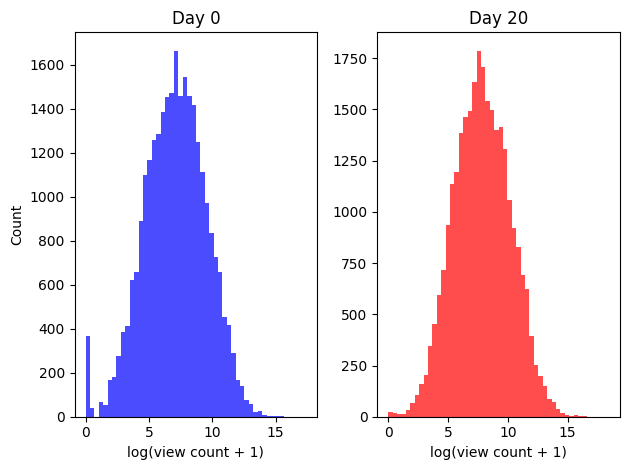

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

bins = 50

day0_log = np.log(df["day0"] + 1)
day15_log = np.log(df["day14"] + 1)
day20_log = np.log(df["day19"] + 1)

plt.clf()

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].hist(day0_log, bins=bins, color='blue', alpha=0.7)
axes[0].set_title('Day 1')
axes[0].set_xlabel('log(view count + 1)')
axes[0].set_ylabel('Count')

axes[1].hist(day20_log, bins=bins, color='red', alpha=0.7)
axes[1].set_title('Day 20')
axes[1].set_xlabel('log(view count + 1)')

plt.tight_layout()
plt.show()


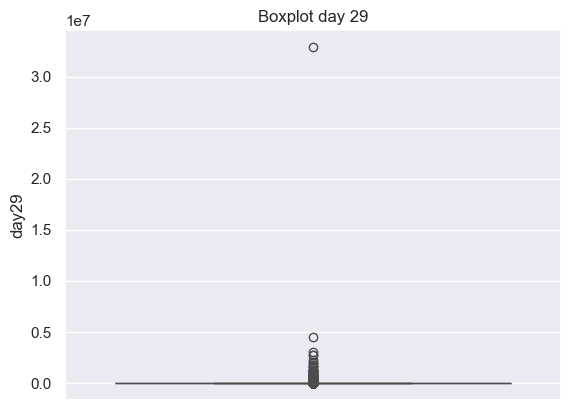

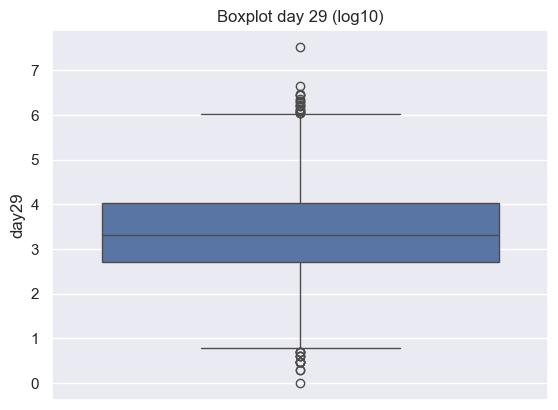

In [33]:
import seaborn as sns

sns.boxplot(df["day29"])
plt.title("Boxplot day 29")
plt.show()
sns.boxplot(day30_log)
plt.title("Boxplot day 29 (log10)")
plt.show()

In [ ]:
print(f"Day 29\nMean: {np.mean(df["day29"])} \nStd dev: ")

Category distribution. First we convert the category numbers to strings.

Text(0, 0.5, 'Count')

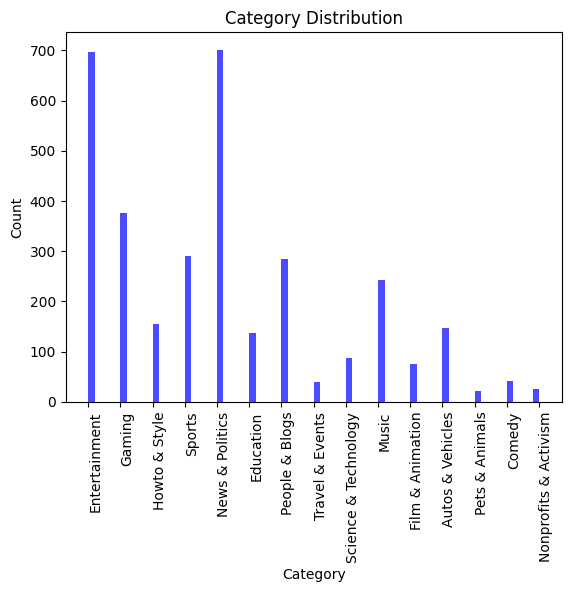

In [12]:
plt.clf()
plt.hist(df["category"], bins=70, color='blue', alpha=0.7)
plt.title('Category Distribution')
plt.xticks(rotation=90, ha="right", rotation_mode="anchor")
plt.xlabel('Category')
plt.ylabel('Count')

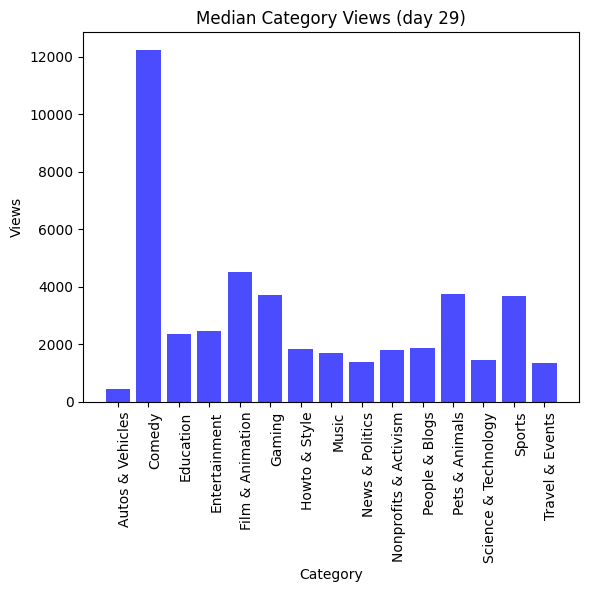

In [13]:
df_numeric = df.select_dtypes(include=[np.number])
cat_means = df.groupby("category")[df_numeric.columns].mean()
cat_median = df.groupby("category")[df_numeric.columns].median()

plt.clf()
plt.bar(cat_means.index, cat_median["day29"], color="blue", alpha=0.7)
plt.title('Median Category Views (day 29)')
plt.xticks(rotation=90, ha="right", rotation_mode="anchor")
plt.xlabel('Category')
plt.ylabel('Views')
plt.show()


## Time Series Analysis

Aggregated time series by category.

First, we pivot the category means to long-format.

In [14]:
cat_long = pd.melt(cat_median.reset_index(), 
                  id_vars=['category'], 
                  value_vars=cat_means.columns, 
                  var_name='day', 
                  value_name='views')

cat_long[:15]

# convert days to int
def day_to_int(str):
    return int(str[3:])

cat_long["day"] = cat_long["day"].apply(day_to_int)

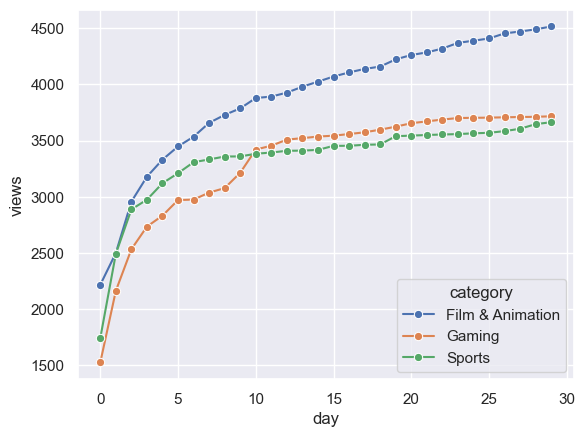

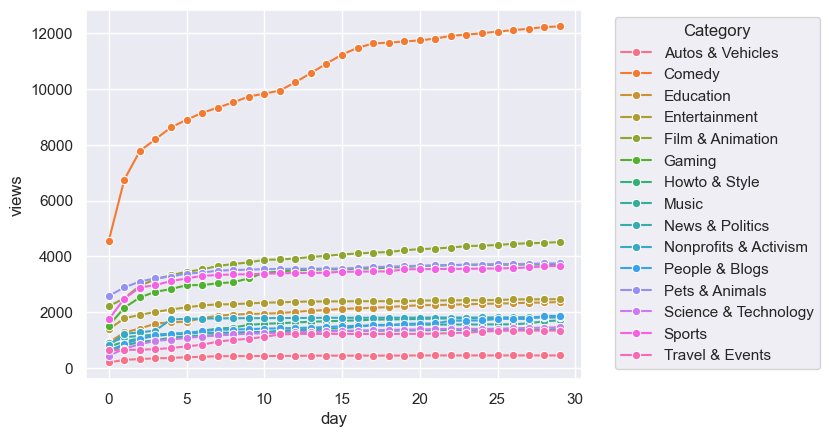

In [15]:
sns.set_theme()
sns.lineplot(
    data=cat_long.loc[
        (cat_long["category"] == "Gaming") | (cat_long["category"] == "Sports") | (cat_long["category"] == "Film & Animation")
    ],
    x="day", y="views", hue="category", marker="o"
)
plt.show()
sns.lineplot(
    data=cat_long,
    x="day", y="views", hue="category", marker="o"
)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

We'll plot the standardized view values also.

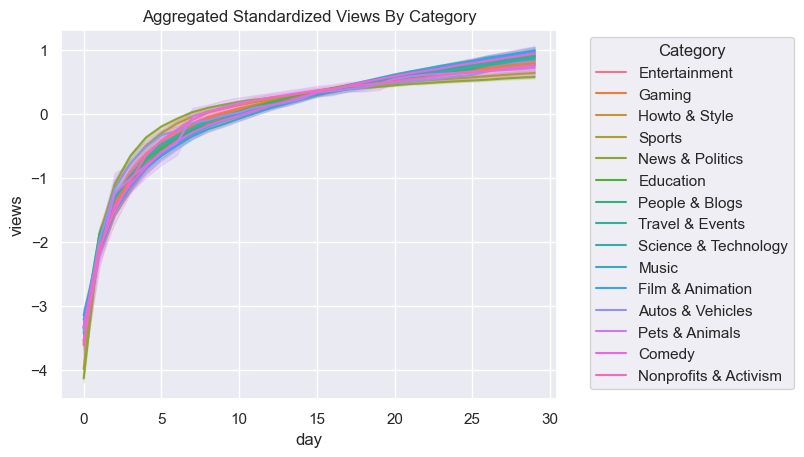

In [16]:
df_long_std = pd.read_pickle("data/video_processed_long.pkl")

sns.lineplot(
    df_long_std, 
    x = "day",
    y = "views",
    hue = "category",
)
plt.title("Aggregated Standardized Views By Category")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

In [27]:
df_long_std[50:60]

,title,thumbnail_url,video_id,subscribers,channel_title,category,blacklisted,day,views
50,DECOR ! AMAZING USEFUL HOME DECOR TIPS AND TRI...,https://i.ytimg.com/vi/fsWMrwXBxtc/mqdefault.jpg,fsWMrwXBxtc,1830000,S R hack,Howto & Style,None,0,-4.664847
51,GTA 6 Trailer 2: October 2024 Early Details Pr...,https://i.ytimg.com/vi/migLyK2ocUs/mqdefault.jpg,migLyK2ocUs,132000,JeffTutorials,Gaming,None,0,-4.903833
52,Elden Ring: Warhawk's Talon Has An Amazing Hea...,https://i.ytimg.com/vi/tc0nTYrlXZc/mqdefault.jpg,tc0nTYrlXZc,518000,ChaseTheBro,Gaming,None,0,-4.699472
53,HERBAL MEDICINE THAT HEALS THE BODY| #145 htt...,https://i.ytimg.com/vi/PglP8BM80pk/mqdefault.jpg,PglP8BM80pk,24600,Dr. Stephen Stokes DC,People & Blogs,None,0,-3.318421
54,WHY DO YOU WANT TO LEAVE YOUR CURRENT JOB? (Jo...,https://i.ytimg.com/vi/jMwhiP7_tcc/mqdefault.jpg,jMwhiP7_tcc,4460000,CareerVidz,Howto & Style,None,0,-3.276022
55,TELL ME ABOUT YOURSELF! (How to INTRODUCE YOUR...,https://i.ytimg.com/vi/I0GRScanjoI/mqdefault.jpg,I0GRScanjoI,4460000,CareerVidz,Howto & Style,None,0,-2.531215
56,Should You Eat Raw Food or Cooked Vegan First ...,https://i.ytimg.com/vi/KAsMjG9_Y6U/mqdefault.jpg,KAsMjG9_Y6U,164000,okraw,Education,None,0,-3.327784
57,Join My Exclusive Gardening & Health Retreat i...,https://i.ytimg.com/vi/6c-QKvP0NDs/mqdefault.jpg,6c-QKvP0NDs,164000,okraw,Education,None,0,-3.992412
58,Lesbian Aux & Gay Adapter - You guys have quit...,https://i.ytimg.com/vi/LbqxL9un8WA/mqdefault.jpg,LbqxL9un8WA,100000,Kelson01,Science & Technology,None,0,-2.739044
59,Forza Horizon 5 : RTX 4090 24GB ( 4K Maximum S...,https://i.ytimg.com/vi/0aszcWvh8aU/mqdefault.jpg,0aszcWvh8aU,391000,GTX 1050 Ti,Gaming,None,0,-1.744206


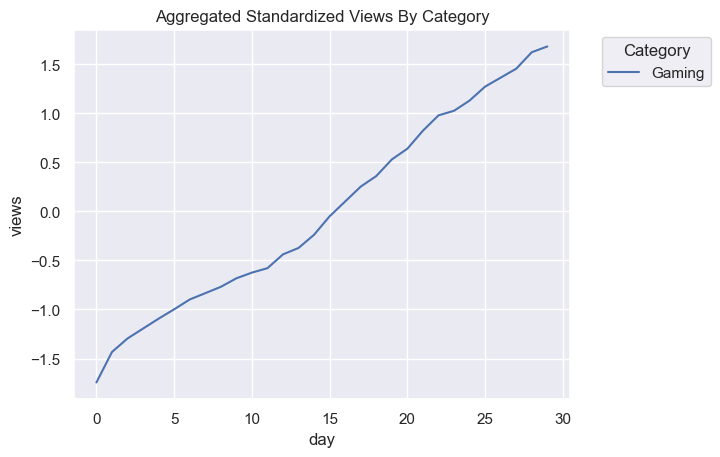

In [28]:
sns.lineplot(
    df_long_std.loc[df_long_std["video_id"] == "0aszcWvh8aU"], 
    x = "day",
    y = "views",
    hue = "category",
)
plt.title("Aggregated Standardized Views By Category")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')